In [165]:
# Import necessary libraries for analysis
import os
import pandas as pd           # Data manipulation and loading
import numpy as np            # Numerical operations
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns         # Statistical data visualization

# Configure Seaborn for better visuals
sns.set(style="whitegrid")

In [38]:
os.getcwd()

'/Users/xiaoyulu/RsearchProject'

In [91]:

df = pd.read_csv('/Users/xiaoyulu/RsearchProject/mxmh_survey_results.csv')
df.head()

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


### Understanding Dataset

#### Demographics and Listening Habits:

**Age**: Age of the respondent.

**Primary streaming service**: The music platform they primarily use.

**Hours per day**: How many hours per day they listen to music.

**While working**: Whether they listen to music while working

**Instrumentalist**, Composer: Whether the person plays an instrument or composes music.

**Fav genre**: Favorite genre of music.

**Exploratory**: Whether they like to explore new music.

**Foreign languages**: Whether they listen to music in foreign languages.

#### Music Preferences:

**BPM**: Beats per minute, likely indicating preferred tempo of music.

Frequency [Genre]: How often the person listens to different genres (e.g., Classical, Country, EDM, etc.).

#### Mental Health Factors:

**Anxiety, Depression, Insomnia, OCD**: These likely represent whether the respondent has any of these conditions 

**Music effects**: How music affects their mental health

In [92]:
# Display basic statistical description (for numerical columns)
df.describe()

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD
count,735.000000,736.000000,6.290000e+02,736.000000,736.000000,736.000000,736.000000
mean,25.206803,3.572758,1.589948e+06,5.837636,4.796196,3.738451,2.637228
std,12.054970,3.028199,3.987261e+07,2.793054,3.028870,3.088689,2.842017
min,10.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,18.000000,2.000000,1.000000e+02,4.000000,2.000000,1.000000,0.000000
50%,21.000000,3.000000,1.200000e+02,6.000000,5.000000,3.000000,2.000000
75%,28.000000,5.000000,1.440000e+02,8.000000,7.000000,6.000000,5.000000
max,89.000000,24.000000,1.000000e+09,10.000000,10.000000,10.000000,10.000000


In [93]:
# Get an overview of columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     736 non-null    object 
 1   Age                           735 non-null    float64
 2   Primary streaming service     735 non-null    object 
 3   Hours per day                 736 non-null    float64
 4   While working                 733 non-null    object 
 5   Instrumentalist               732 non-null    object 
 6   Composer                      735 non-null    object 
 7   Fav genre                     736 non-null    object 
 8   Exploratory                   736 non-null    object 
 9   Foreign languages             732 non-null    object 
 10  BPM                           629 non-null    float64
 11  Frequency [Classical]         736 non-null    object 
 12  Frequency [Country]           736 non-null    object 
 13  Frequ

In [94]:
df.drop(columns=['Timestamp', 'Primary streaming service', 'BPM','Permissions'], inplace=True)

In [95]:
df.head()

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects
0,18.0,3.0,Yes,Yes,Yes,Latin,Yes,Yes,Rarely,Never,...,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN
1,63.0,1.5,Yes,No,No,Rock,Yes,No,Sometimes,Never,...,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN
2,18.0,4.0,No,No,No,Video game music,No,Yes,Never,Never,...,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect
3,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,Never,...,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve
4,18.0,4.0,Yes,No,No,R&B,Yes,No,Never,Never,...,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve


In [124]:
is_artist =(df['Instrumentalist']=='Yes')|( df['Composer']=='Yes')
Artist_df = df[is_artist].copy()

In [132]:
Artist_df

,Age,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,Frequency [Classical],Frequency [Country],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Artist
0,18.0,3.0,Yes,Yes,Yes,Latin,Yes,Yes,Rarely,Never,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,Yes
3,61.0,2.5,Yes,No,Yes,Jazz,Yes,Yes,Sometimes,Never,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,Yes
5,18.0,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,Rarely,Sometimes,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,Yes
6,18.0,3.0,Yes,Yes,No,Video game music,Yes,Yes,Sometimes,Never,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,Yes
10,18.0,3.0,Yes,Yes,No,Country,Yes,No,Never,Very frequently,...,Rarely,Never,Rarely,Never,7.0,7.0,4.0,7.0,No effect,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,14.0,7.0,Yes,Yes,No,Country,Yes,No,Rarely,Very frequently,...,Sometimes,Sometimes,Very frequently,Rarely,7.0,3.0,1.0,2.0,Improve,Yes
731,17.0,2.0,Yes,Yes,No,Rock,Yes,Yes,Very frequently,Rarely,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,Yes
732,18.0,1.0,Yes,Yes,No,Pop,Yes,Yes,Rarely,Rarely,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,Yes
733,19.0,6.0,Yes,No,Yes,Rap,Yes,No,Rarely,Sometimes,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,Yes


In [131]:
Artist_df['Artist'].unique()

array(['Yes'], dtype=object)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           735 non-null    float64
 1   Hours per day                 736 non-null    float64
 2   While working                 733 non-null    object 
 3   Instrumentalist               732 non-null    object 
 4   Composer                      735 non-null    object 
 5   Fav genre                     736 non-null    object 
 6   Exploratory                   736 non-null    object 
 7   Foreign languages             732 non-null    object 
 8   Frequency [Classical]         736 non-null    object 
 9   Frequency [Country]           736 non-null    object 
 10  Frequency [EDM]               736 non-null    object 
 11  Frequency [Folk]              736 non-null    object 
 12  Frequency [Gospel]            736 non-null    object 
 13  Frequ

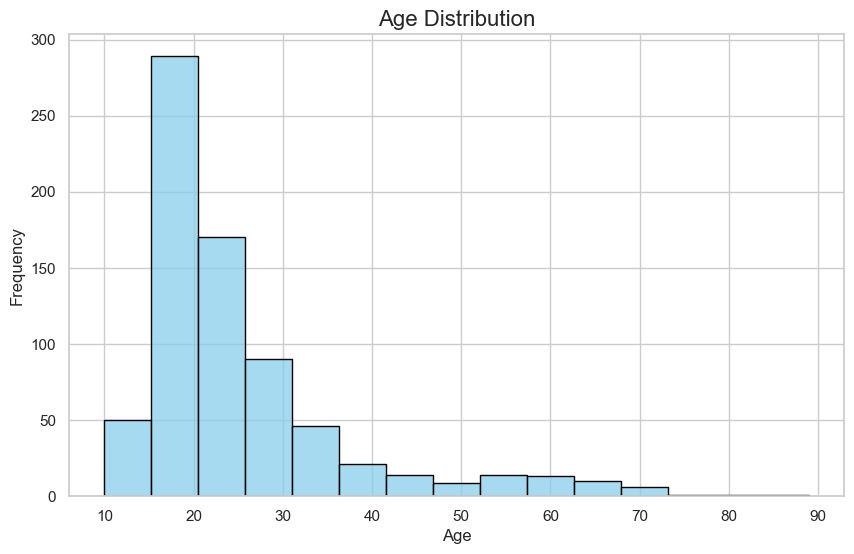

In [97]:
# Plot histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=False, color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Age Distribution', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show plot
plt.show()

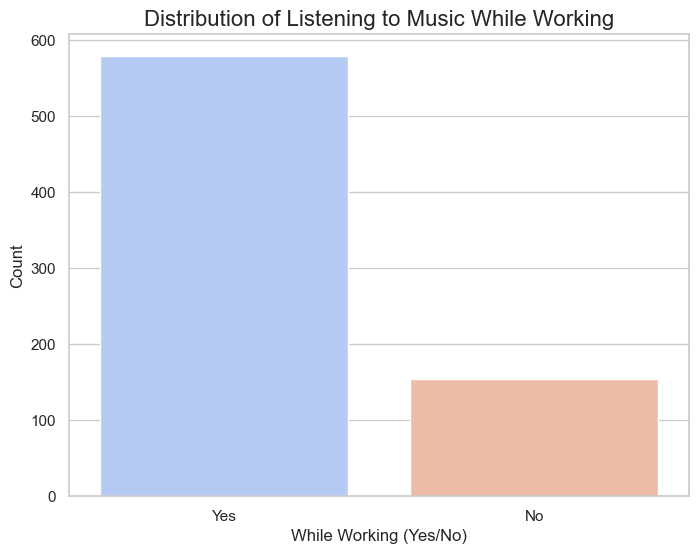

In [98]:
# Count plot for 'While working'
plt.figure(figsize=(8, 6))
sns.countplot(x='While working', data=df, palette='coolwarm')

# Customize the plot
plt.title('Distribution of Listening to Music While Working', fontsize=16)
plt.xlabel('While Working (Yes/No)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show plot
plt.show()

In [104]:
# Get the value counts of 'Fav genre'
genre_distribution = df['Fav genre'].value_counts()

# Display the genre distribution
print(genre_distribution)

Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: Fav genre, dtype: int64


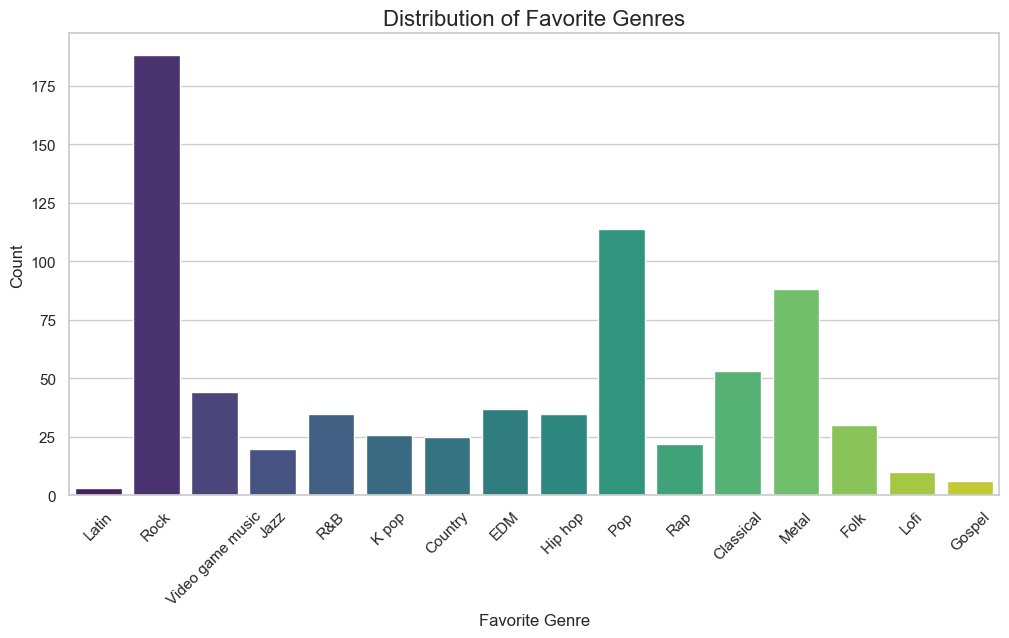

In [103]:
# Set plot size and style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create a count plot for 'Fav genre'
sns.countplot(x='Fav genre', data=df, palette='viridis')

# Customize the plot
plt.title('Distribution of Favorite Genres', fontsize=16)
plt.xlabel('Favorite Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability

# Show the plot
plt.show()

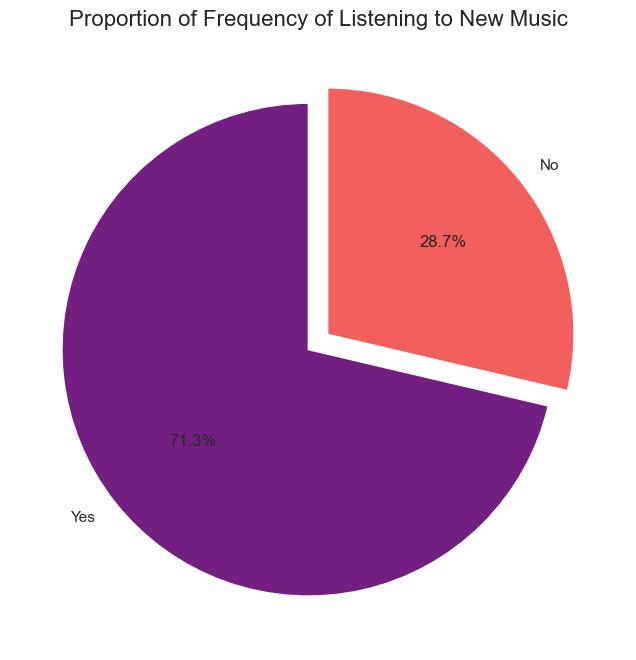

In [106]:
plt.figure(figsize=(8, 8))
df['Exploratory'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('magma', n_colors=df['Exploratory'].nunique()), startangle=90, explode=[0.05] * df['Exploratory'].nunique())

# Customize the plot
plt.title('Proportion of Frequency of Listening to New Music', fontsize=16)
plt.ylabel('')  # Hide the y-label for a cleaner plot

# Show the plot
plt.show()

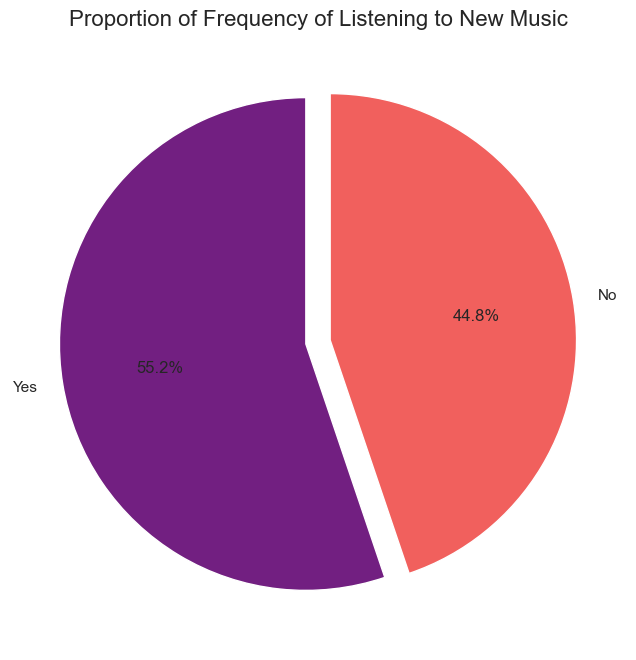

In [107]:
plt.figure(figsize=(8, 8))
df['Foreign languages'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('magma', n_colors=df['Foreign languages'].nunique()), startangle=90, explode=[0.05] * df['Foreign languages'].nunique())

# Customize the plot
plt.title('Proportion of Frequency of Listening to New Music', fontsize=16)
plt.ylabel('')  # Hide the y-label for a cleaner plot

# Show the plot
plt.show()

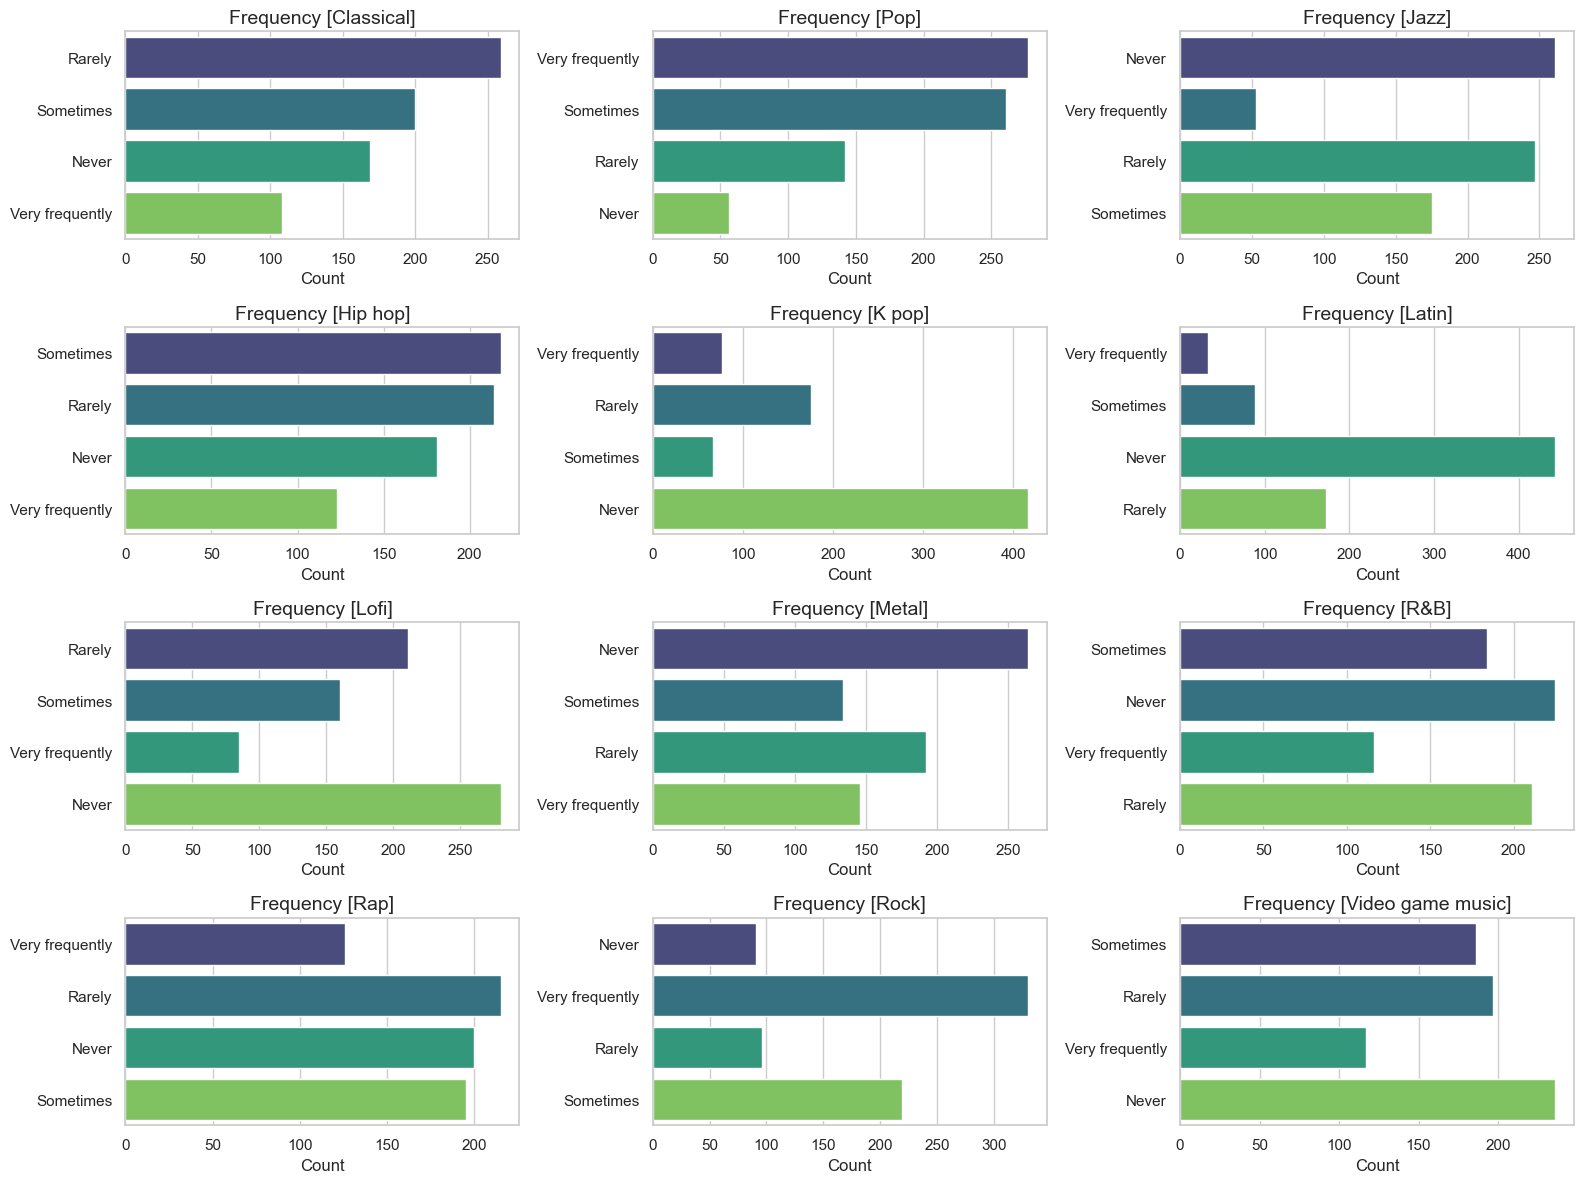

In [135]:
# List of columns that store the frequency of listening to different genres (duplicates removed)
frequency_columns = ['Frequency [Classical]',
                     'Frequency [Pop]', 
                     'Frequency [Jazz]',
                     'Frequency [Hip hop]',
                     'Frequency [K pop]',
                     'Frequency [Latin]',
                     'Frequency [Lofi]',
                     'Frequency [Metal]', 
                     'Frequency [R&B]',
                     'Frequency [Rap]',
                     'Frequency [Rock]',
                     'Frequency [Video game music]'
                    ]

# Set up the plot grid size
plt.figure(figsize=(16, 12))

# Number of rows and columns for the grid
n_rows = 4
n_cols = 3

# Loop through each frequency column and plot its distribution
for i, col in enumerate(frequency_columns):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a grid of 4x3 subplots
    sns.countplot(y=col, data=df, palette='viridis')
    plt.title(f'{col}', fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.ylabel('')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


How does listening to music while working affect anxiety?

In [167]:
# Calculate mean anxiety levels for people who listen to music while working and those who don't
mean_anxiety_working = df.groupby('While working')['Anxiety'].mean()

# Display the results
print(mean_anxiety_working)

While working
No     5.623377
Yes    5.885147
Name: Anxiety, dtype: float64


People who listen to music while working have slightly higher anxiety levels than those who do not.

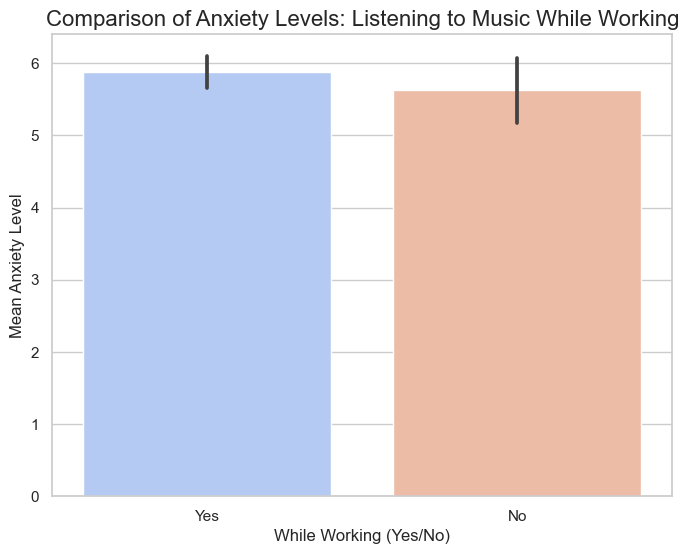

In [168]:
# Set up the plot size
plt.figure(figsize=(8, 6))

# Create a bar plot for the mean anxiety levels
sns.barplot(x='While working', y='Anxiety', data=df, palette='coolwarm')

# Customize the plot
plt.title('Comparison of Anxiety Levels: Listening to Music While Working', fontsize=16)
plt.xlabel('While Working (Yes/No)', fontsize=12)
plt.ylabel('Mean Anxiety Level', fontsize=12)

# Display the plot
plt.show()

Is frequent listening to high-energy genres like EDM, Hip-Hop, or Metal associated with increased or reduced stress and anxiety?

In [136]:
# Define high-energy genres columns
high_energy_genres = [
    'Frequency [Hip hop]', 'Frequency [K pop]', 'Frequency [Metal]', 
    'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 
    'Frequency [Video game music]'
]

# Create a new column 'High Energy Listener' that is 'Yes' if the person listens to any high-energy genre frequently
df['High Energy Listener'] = df[high_energy_genres].apply(lambda row: 'Yes' if any(row == 'Sometimes') or any(row == 'Very frequently') else 'No', axis=1)

# Verify the new column
df[['High Energy Listener', 'Anxiety']].head()


,High Energy Listener,Anxiety
0,Yes,3.0
1,Yes,7.0
2,Yes,7.0
3,Yes,9.0
4,Yes,7.0


In [138]:
# Calculate the mean anxiety levels for high-energy listeners vs non-listeners
anxiety_comparison = df.groupby('High Energy Listener')['Anxiety'].mean().round(2)

# Display the result
print(anxiety_comparison)


High Energy Listener
No     5.61
Yes    5.85
Name: Anxiety, dtype: float64


The difference in average anxiety levels is not very large, but the fact that it is higher for high-energy listeners could suggest that those who prefer more intense or fast-paced music may experience slightly higher anxiety levels.

Do younger vs. older age groups differ in how music affects their mental health?

In [139]:
# Create a new column 'Age Group' based on age
df['Age Group'] = df['Age'].apply(lambda x: 'Younger (<30)' if x < 30 else 'Older (>=30)')

# Verify the new age groups
df[['Age', 'Age Group']].head()

,Age,Age Group
0,18.0,Younger (<30)
1,63.0,Older (>=30)
2,18.0,Younger (<30)
3,61.0,Older (>=30)
4,18.0,Younger (<30)


In [142]:
# Calculate the mean anxiety and depression levels for each age group based on 'Music affects'
mental_health_by_age = df.groupby(['Age Group', 'Music effects'])[['Anxiety', 'Depression']].mean().round(2)

# Display the results
print(mental_health_by_age)

                             Anxiety  Depression
Age Group     Music effects                     
Older (>=30)  Improve           5.44        4.47
              No effect         4.63        3.46
              Worsen            5.80        8.40
Younger (<30) Improve           6.20        4.96
              No effect         5.31        4.72
              Worsen            7.17        6.67


Anxiety Levels Across Age Groups
Older Group (≥30):

Music Improves: Anxiety = 5.44
Music Has No Effect: Anxiety = 4.63
Music Worsens Anxiety: Anxiety = 5.80
Younger Group (<30):

Music Improves: Anxiety = 6.20 (higher than the older group)
Music Has No Effect: Anxiety = 5.31
Music Worsens Anxiety: Anxiety = 7.17 (much higher than the older group)

Younger people (<30) seem to experience higher anxiety compared to older people (≥30) in all categories of music effects.
When music "worsens" mental health, younger individuals report a much higher anxiety level (7.17) compared to older individuals (5.80).
Music "improves" anxiety for both age groups, but older individuals benefit more from this improvement (anxiety of 5.44 compared to 6.20 for younger people).


Depression Levels Across Age Groups
Older Group (≥30):

Music Improves: Depression = 4.47
Music Has No Effect: Depression = 3.46
Music Worsens Depression: Depression = 8.40
Younger Group (<30):

Music Improves: Depression = 4.96
Music Has No Effect: Depression = 4.72
Music Worsens Depression: Depression = 6.67

Interestingly, when music "worsens" mental health:
Older individuals experience much higher depression levels (8.40) compared to younger individuals (6.67).
In other cases (Improve and No effect):
Younger individuals have slightly higher depression levels across the board, but the differences are not as large as in anxiety.

Do individuals who explore new music genres tend to have lower levels of anxiety or depression?

In [158]:
df['Exploratory'].unique()

array(['Yes', 'No'], dtype=object)

In [159]:
# Calculate the mean anxiety and depression levels for exploratory and non-exploratory individuals
mental_health_exploratory = df.groupby('Exploratory')[['Anxiety', 'Depression']].mean().round(2)

# Display the results
print(mental_health_exploratory)

             Anxiety  Depression
Exploratory                     
No              5.74        4.50
Yes             5.88        4.91


Individuals who explore new music genres have a slightly higher mean anxiety (5.88) compared to those who don’t (5.74).
The difference is relatively small, but it indicates that music exploration may not necessarily be associated with lower anxiety levels—it is, in fact, marginally higher for those who explore new music.
Similar to anxiety, individuals who explore new music genres have a slightly higher mean depression (4.91) compared to those who don’t (4.50).
Again, the difference is small but indicates that exploring new music does not seem to be associated with lower depression levels—if anything, those who explore new music have a higher mean depression level.

Analyze whether people who are more involved in creating music (i.e., composers or instrumentalists) experience greater mental health benefits compared to those who are simply listeners.

In [163]:
# Create a new column 'Music Creator' based on whether the person is a composer or instrumentalist
df['Music Creator'] = df.apply(lambda row: 'Yes' if row['Instrumentalist'] == 'Yes' or row['Composer'] == 'Yes' else 'No', axis=1)
s
# Verify the new column
df[['Instrumentalist', 'Composer', 'Music Creator']].head()

,Instrumentalist,Composer,Music Creator
0,Yes,Yes,Yes
1,No,No,No
2,No,No,No
3,No,Yes,Yes
4,No,No,No


In [164]:
# Calculate the mean anxiety and depression levels for music creators vs listeners
mental_health_comparison = df.groupby('Music Creator')[['Anxiety', 'Depression']].mean()

# Display the results
print(mental_health_comparison)

                Anxiety  Depression
Music Creator                      
No             5.812634    4.771949
Yes            5.881041    4.838290


Creating music does not seem to be associated with significant mental health benefits compared to simply listening. In fact, the differences are very small, with music creators having slightly higher anxiety and depression levels than non-creators.

While music is often cited as a tool for improving mental health, this analysis suggests that simply listening to music may offer similar mental health benefits as actively creating it. Additionally, the act of exploring new music genres does not appear to have a significant impact on reducing anxiety or depression.
The age group differences reveal that the effects of music on mental health are more nuanced, with younger individuals tending to experience more anxiety and older individuals facing higher depression when music has a negative effect.
mental health benefits of music are relatively consistent across various types of engagement (listening vs creating),with age being a more important factor in determining how music affects individuals' mental health.